<a href="https://colab.research.google.com/github/mietekdom/Data_Science_Cases/blob/master/GE/05_GE_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import biblotek

In [2]:
import pandas as pd
import numpy as np
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')

Pandas: 1.0.5
Numpy: 1.18.5


Załadowanie danych

In [3]:
def fetch_financial_data(company='GE'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-08-28 to 2015-09-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [4]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-28,6.510,6.620,6.470,6.610,59161658
2020-08-27,6.520,6.630,6.450,6.480,73387919
2020-08-26,6.620,6.620,6.440,6.480,57303986
2020-08-25,6.650,6.700,6.480,6.590,69449105
2020-08-24,6.350,6.640,6.300,6.630,102785415
...,...,...,...,...,...
2015-09-09,22.467,22.486,21.825,21.889,38820046
2015-09-08,21.852,22.272,21.639,22.254,51832438
2015-09-04,21.560,21.560,21.265,21.397,39960825


In [5]:
df.head(10) # zwraca pierwsze 10 wierszy

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-28,6.51,6.6200,6.47,6.61,59161658
2020-08-27,6.52,6.6300,6.45,6.48,73387919
2020-08-26,6.62,6.6200,6.44,6.48,57303986
2020-08-25,6.65,6.7000,6.48,6.59,69449105
2020-08-24,6.35,6.6400,6.30,6.63,102785415
2020-08-21,6.25,6.3800,6.23,6.31,59851459
2020-08-20,6.33,6.3769,6.21,6.27,63763962
2020-08-19,6.47,6.5700,6.35,6.38,54361951
2020-08-18,6.49,6.5700,6.41,6.44,42686043


In [6]:
df.columns # nazwy kolumn

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
df.columns = [col.lower() for col in df.columns] # zmiana liter na małe
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [8]:
df.describe() # wyswietla statystyki 

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,17.793542,17.971195,17.612306,17.785238,6.834145e+07
std,8.342523,8.358601,8.344713,8.357820,4.878666e+07
min,5.601600,5.651500,5.471800,5.481800,1.418883e+07
25%,10.055000,10.255000,9.934000,10.064000,3.715072e+07
50%,14.330000,14.522000,14.134000,14.301000,5.416523e+07
75%,27.049000,27.328000,26.879000,27.106000,8.327024e+07
max,30.340000,30.375000,30.135000,30.311000,4.794930e+08


Eksploracja danych

In [9]:
df[['open', 'close']] # wycinamy jako Data Frame

,open,close
Date,,
2020-08-28,6.510,6.610
2020-08-27,6.520,6.480
2020-08-26,6.620,6.480
2020-08-25,6.650,6.590
2020-08-24,6.350,6.630
...,...,...
2015-09-09,22.467,21.889
2015-09-08,21.852,22.254
2015-09-04,21.560,21.397


In [10]:
df.iloc[:, 0] #wycinamy pierwszą kolumnę

Date
2020-08-28     6.510
2020-08-27     6.520
2020-08-26     6.620
2020-08-25     6.650
2020-08-24     6.350
               ...  
2015-09-09    22.467
2015-09-08    21.852
2015-09-04    21.560
2015-09-03    22.074
2015-09-02    21.523
Name: open, Length: 1257, dtype: float64

In [11]:
df.iloc[:, [0, 3]] # wycinamy kilka kolumn

,open,close
Date,,
2020-08-28,6.510,6.610
2020-08-27,6.520,6.480
2020-08-26,6.620,6.480
2020-08-25,6.650,6.590
2020-08-24,6.350,6.630
...,...,...
2015-09-09,22.467,21.889
2015-09-08,21.852,22.254
2015-09-04,21.560,21.397


Wycinanie wierszy

In [12]:
df.iloc[[0, 3],:] # wycinamy wiersz pierwszy oraz czwarty

,open,high,low,close,volume
Date,,,,,
2020-08-28,6.51,6.62,6.47,6.61,59161658
2020-08-25,6.65,6.70,6.48,6.59,69449105


In [13]:
df = df.sort_index() # sortowanie wartości
df.head()

,open,high,low,close,volume
Date,,,,,
2015-09-02,21.523,21.915,21.246,21.907,56619445
2015-09-03,22.074,22.244,21.746,21.852,37646287
2015-09-04,21.560,21.560,21.265,21.397,39960825
2015-09-08,21.852,22.272,21.639,22.254,51832438
2015-09-09,22.467,22.486,21.825,21.889,38820046


In [14]:
df['close_shift'] = df[['close']].shift(1) #przesuwamy wiersze o jeden
df.head()

,open,high,low,close,volume,close_shift
Date,,,,,,
2015-09-02,21.523,21.915,21.246,21.907,56619445,NaN
2015-09-03,22.074,22.244,21.746,21.852,37646287,21.907
2015-09-04,21.560,21.560,21.265,21.397,39960825,21.852
2015-09-08,21.852,22.272,21.639,22.254,51832438,21.397
2015-09-09,22.467,22.486,21.825,21.889,38820046,22.254


In [15]:
df['Daily_Change'] = df.close / df.close_shift -1 #dzienna zmiana procentowa
df.head()

,open,high,low,close,volume,close_shift,Daily_Change
Date,,,,,,,
2015-09-02,21.523,21.915,21.246,21.907,56619445,NaN,NaN
2015-09-03,22.074,22.244,21.746,21.852,37646287,21.907,-0.002511
2015-09-04,21.560,21.560,21.265,21.397,39960825,21.852,-0.020822
2015-09-08,21.852,22.272,21.639,22.254,51832438,21.397,0.040052
2015-09-09,22.467,22.486,21.825,21.889,38820046,22.254,-0.016402


In [16]:
df.Daily_Change.min() # najwiekszy dzienny spadek

-0.15159092648822425

In [17]:
df.Daily_Change.max() # najwiekszy dzienny wzrost

0.14728974413611118

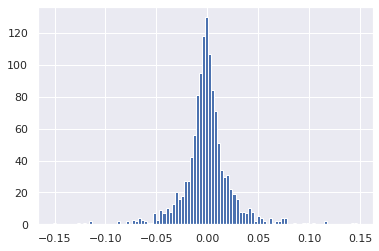

In [18]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

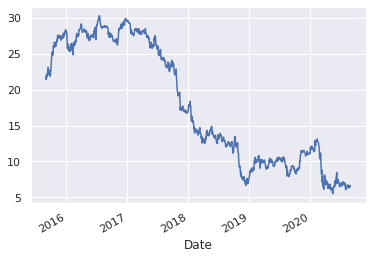

In [19]:
df.close.plot()

In [21]:
df_positive = df[df.Daily_Change > 0] # filtrujemy kiedy dodatnia stopa zwrotu
df_positive

,open,high,low,close,volume,close_shift,Daily_Change
Date,,,,,,,
2015-09-08,21.852,22.272,21.639,22.254,51832438,21.397,0.040052
2015-09-10,21.899,22.166,21.844,22.006,39298194,21.889,0.005345
2015-09-11,22.057,22.254,21.844,22.244,35782519,22.006,0.010815
2015-09-15,22.200,22.690,22.024,22.556,51969052,22.083,0.021419
2015-09-16,22.761,23.208,22.662,23.118,69023483,22.556,0.024916
...,...,...,...,...,...,...,...
2020-08-11,6.870,7.000,6.690,6.730,93141505,6.670,0.008996
2020-08-14,6.540,6.720,6.470,6.660,50397190,6.600,0.009091
2020-08-21,6.250,6.380,6.230,6.310,59851459,6.270,0.006380


In [22]:
df_negative = df[df.Daily_Change < 0] # filtrujemy ujemne wartości
df_negative

,open,high,low,close,volume,close_shift,Daily_Change
Date,,,,,,,
2015-09-03,22.074,22.2440,21.746,21.852,37646287,21.907,-0.002511
2015-09-04,21.560,21.5600,21.265,21.397,39960825,21.852,-0.020822
2015-09-09,22.467,22.4860,21.825,21.889,38820046,22.254,-0.016402
2015-09-14,22.264,22.2720,21.932,22.083,29428184,22.244,-0.007238
2015-09-17,22.939,23.3260,22.733,22.803,54297804,23.118,-0.013626
...,...,...,...,...,...,...,...
2020-08-18,6.490,6.5700,6.410,6.440,42686043,6.470,-0.004637
2020-08-19,6.470,6.5700,6.350,6.380,54361951,6.440,-0.009317
2020-08-20,6.330,6.3769,6.210,6.270,63763962,6.380,-0.017241


In [25]:
df[df.close == df.high] # cena zamknięcia równa cenie najwyższej w ciągu dnia

,open,high,low,close,volume,close_shift,Daily_Change
Date,,,,,,,
2015-10-07,24.7380,24.9800,24.5760,24.9800,73197247,24.5470,0.017640
2015-11-02,26.0340,26.4450,25.9760,26.4450,66148312,26.0150,0.016529
2016-02-12,24.9850,25.6140,24.7960,25.6140,63587717,24.8780,0.029584
2016-03-02,27.2050,27.5720,27.1870,27.5720,40705150,27.2960,0.010111
2016-03-24,28.2380,28.4210,28.1560,28.4210,30207400,28.3830,0.001339
2016-06-02,27.4150,27.4520,27.2690,27.4520,20820429,27.5090,-0.002072
2016-08-18,28.7630,28.9310,28.7080,28.9310,30458472,28.8000,0.004549
2016-09-07,28.5250,28.5890,28.3500,28.5890,29615332,28.5800,0.000315
2016-12-07,28.7650,29.3140,28.6900,29.3140,35540275,28.9140,0.013834
